
https://www.datacamp.com/pt/tutorial/pca-analysis-r


Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

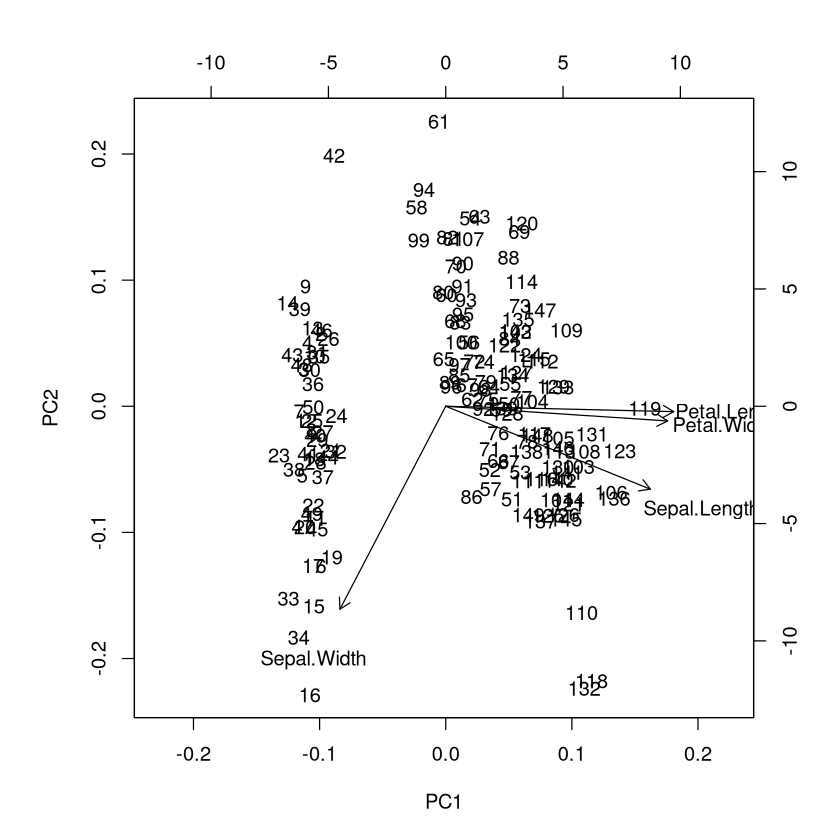

In [1]:
data(iris)
iris_pca <- prcomp(iris[,1:4], scale=TRUE)
summary(iris_pca)  # PC1+PC2 ~73%+23%=96% variância
biplot(iris_pca, col=c("black","red","green")[iris$Species])


# Redução de Dimensionalidade com PCA: Tutorial Prático em R

## 1. Introdução Teórica

**PCA (Principal Component Analysis)** é uma técnica que transforma dados de alta dimensionalidade em um espaço de menor dimensão, mantendo a máxima variância possível. Com Iris (4 variáveis), podemos reduzir para 2-3 componentes sem perder informação significativa.

---

## 2. Carregamento e Exploração dos Dados



In [2]:
# Carrega a base iris
data(iris)

# Verifica estrutura
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [3]:
# Resumo estatístico
summary(iris[,1:4])

# Visualiza as primeiras linhas
head(iris, 3)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa



## 3. Padronização (Scaling) - Passo Crítico

PCA é sensível à escala das variáveis. Como Sepal.Length (≈4-8) é diferente de Petal.Width (≈0.1-2.5), **sempre** padronizar para média=0 e desvio=1:


In [4]:
# Extrai apenas as 4 variáveis numéricas
iris_dados <- iris[,1:4]

# Padroniza (scale=TRUE)
iris_scaled <- scale(iris_dados)

# Verifica: cada coluna deve ter média ≈0 e sd ≈1
colMeans(iris_scaled)  # Tudo próximo de 0

Sepal.Length   Sepal.Width  Petal.Length   Petal.Width 
-4.480675e-16  2.035409e-16 -2.844947e-17 -3.714621e-17

In [5]:
apply(iris_scaled, 2, sd)  # Tudo = 1

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
           1            1            1            1


## 4. Aplicação de PCA


In [6]:
# Função prcomp() faz PCA
iris_pca <- prcomp(iris_dados, scale=TRUE)

# Ou equivalentemente
iris_pca <- prcomp(iris_scaled)

# Examina a estrutura do objeto PCA
str(iris_pca)

List of 5
 $ sdev    : num [1:4] 1.708 0.956 0.383 0.144
 $ rotation: num [1:4, 1:4] 0.521 -0.269 0.58 0.565 -0.377 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 $ center  : Named num [1:4] -4.48e-16 2.04e-16 -2.84e-17 -3.71e-17
  ..- attr(*, "names")= chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ scale   : Named num [1:4] 0.828 0.436 1.765 0.762
  ..- attr(*, "names")= chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ x       : num [1:150, 1:4] -2.26 -2.07 -2.36 -2.29 -2.38 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 - attr(*, "class")= chr "prcomp"



## 5. Interpretação da Variância Explicada


In [7]:
# Resumo com variância explicada
summary(iris_pca)
#> Importance of components:
#>                           PC1    PC2     PC3     PC4
#> Standard deviation:      1.724  0.956  0.383  0.191
#> Proportion of Variance:  0.729  0.229  0.037  0.005
#> Cumulative Proportion:   0.729  0.958  0.995  1.000

# Interpretação:
# PC1 explica 72.9% da variância
# PC1 + PC2 explicam 95.8% (REDUÇÃO: 4D → 2D!)
# PC1 + PC2 + PC3 explicam 99.5% (praticamente tudo)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000


**O que significa?** Com apenas 2 componentes (PC1 e PC2), capturamos 95.8% da informação original de 4 dimensões. As outras 2 componentes (PC3, PC4) contêm apenas 4.2% da variância e podem ser descartadas.


## 6. Visualização: Scree Plot (Cotovelo)


In [1]:
# Variância explicada por cada componente
var_explicada <- (iris_pca$sdev^2) / sum(iris_pca$sdev^2)

# Plot da variância cumulativa
plot(cumsum(var_explicada), 
     type="b", 
     xlab="Número de Componentes", 
     ylab="Variância Acumulada",
     main="Scree Plot Acumulativo - Iris",
     ylim=c(0,1))
abline(h=0.95, col="red", lty=2, label="95%")
abline(v=2, col="blue", lty=2)
grid()

# Interpretação: A "curva do cotovelo" entre PC1 e PC2 sugere 
# 2 componentes como ponto ideal

ERROR: Error: object 'iris_pca' not found
